<a href="https://colab.research.google.com/github/Ashu-00/AutoEncodersAndGenerators/blob/main/AutoEncoders(Vanilla).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [ ]:
dataset=torchvision.datasets.MNIST('data',train=True,download=True,transform=torchvision.transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15922942.79it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 480880.39it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4410917.89it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10053049.48it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
generator1 = torch.Generator().manual_seed(42)
trainset,testset=torch.utils.data.random_split(dataset,[0.9,0.1],generator=generator1)

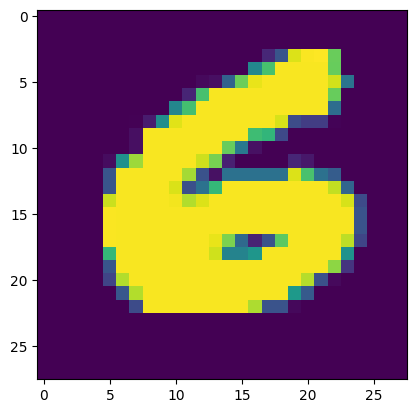

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainset[0][0].squeeze(0))

In [ ]:
class VannilaAE(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Conv2d(1,8,3,stride=1),
        nn.ReLU(),
        nn.Conv2d(8,16,5,stride=1),
        nn.ReLU(),
        nn.Conv2d(16,32,5,stride=2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
    )
    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(32,16,3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16,8,5, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(8,1,8, stride=1),
            nn.Sigmoid(),
    )
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x



In [ ]:
def train(model,train_loader,epochs=3,lr=9e-3,device="cpu"):
  model.train()
  model.to(device)
  optimizer=optim.Adam(model.parameters(),lr=lr)
  lossfunc=nn.BCELoss()
  lossavg=0

  for epoch in range(epochs):
    for (bid,(inp,lab)) in enumerate(train_loader):
      inp=inp.to(device)
      optimizer.zero_grad()
      #lab=lab.to(device)
      out=model(inp)
      loss=lossfunc(out,inp)
      loss.backward()
      optimizer.step()
      lossavg+=loss.item()
      if bid%10==0:
        print(f"epoch:{epoch} batch={bid} loss:{loss.item()}")

    print(f"epoch:{epoch} loss:{lossavg/len(train_loader)}")


In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)

In [ ]:
model=VannilaAE()
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
train(model,trainloader,epochs=1,device=device)

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch:0 batch=0 loss:0.700829803943634
epoch:0 batch=10 loss:0.5773718357086182
epoch:0 batch=20 loss:0.397442102432251
epoch:0 batch=30 loss:0.2504093050956726
epoch:0 batch=40 loss:0.20531193912029266
epoch:0 batch=50 loss:0.18377366662025452
epoch:0 batch=60 loss:0.17096832394599915
epoch:0 batch=70 loss:0.1632220298051834
epoch:0 batch=80 loss:0.1408255249261856
epoch:0 batch=90 loss:0.1333276778459549
epoch:0 batch=100 loss:0.12674854695796967
epoch:0 batch=110 loss:0.12120281904935837
epoch:0 batch=120 loss:0.12151075899600983
epoch:0 batch=130 loss:0.11220508813858032
epoch:0 batch=140 loss:0.10712257772684097
epoch:0 batch=150 loss:0.11123871058225632
epoch:0 batch=160 loss:0.1064513698220253
epoch:0 batch=170 loss:0.10258538275957108
epoch:0 batch=180 loss:0.1020987257361412
epoch:0 batch=190 loss:0.09646493196487427
epoch:0 batch=200 loss:0.09847699105739594
epoch:0 batch=210 loss:0.10138176381587982
epoch:0 batch=220 loss:0.09315875172615051
epoch:0 batch=230 loss:0.10063604

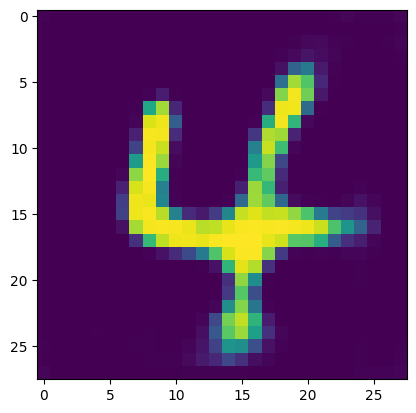

In [ ]:
#test1

img=testset[98][0].to(device).unsqueeze(0)
out=model(img)
plt.imshow(out.detach().cpu().squeeze(0)[0,:,:])


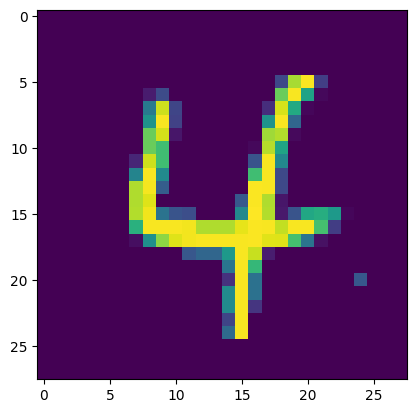

In [ ]:
plt.imshow(img.detach().cpu().squeeze(0)[0,:,:])